In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [66]:
df = pd.read_excel(r"C:\Users\sk062\Downloads\merge_df (1).xlsx")

In [67]:
# 指標づくり
df_ratios = df.copy()
df_ratios['施設あたりの子供数'] = df_ratios['在園者数'] / df_ratios['保育所等数（基本票）']
df_ratios['教員一人あたりの子供数'] = df_ratios['在園者数'] / df_ratios['総教員数']
df_ratios['施設あたりの教員数'] = df_ratios['総教員数'] / df_ratios['保育所等数（基本票）']

In [68]:
df_ratios

,地域,2023年度 待機児童,A1101_総人口【人】,A1201_0～4歳人口【人】,保育所等数（基本票）,保育所数÷子供の人数,総教員数,園長,副園長,教頭,...,助教諭,養護教諭,養護助教諭,栄養教諭,講師,教育補助員,在園者数,施設あたりの子供数,教員一人あたりの子供数,施設あたりの教員数
0,北海道,62,5092000,142000,1099,0.006072,704,17,5,1,...,101,5,0,8,103,265,6846,6.229299,9.724432,0.640582
1,青森県,0,1184000,32000,472,0.014750,73,10,0,0,...,3,1,0,2,13,48,57303,121.404661,784.972603,0.154661
2,岩手県,27,1163000,32000,391,0.012219,131,12,1,0,...,2,3,0,0,21,71,3646,9.324808,27.832061,0.335038
3,宮城県,41,2264000,69000,515,0.007464,476,28,3,0,...,5,15,0,0,61,146,6959,13.512621,14.619748,0.924272
4,秋田県,3,914000,22000,268,0.012182,48,5,1,0,...,0,0,0,0,14,28,9075,33.861940,189.062500,0.179104
5,山形県,0,1026000,30000,302,0.010067,84,2,1,0,...,1,2,0,0,27,40,2955,9.784768,35.178571,0.278146
6,福島県,13,1767000,52000,391,0.002058,317,40,7,8,...,7,12,1,0,120,166,5603,14.329923,17.675079,0.810742
7,茨城県,5,2825000,87000,629,0.007230,595,24,4,1,...,9,2,4,3,249,293,2702,4.295707,4.541176,0.945946
8,栃木県,0,1897000,58000,439,0.020905,137,10,4,0,...,0,6,0,0,53,20,1965,4.476082,14.343066,0.312073
9,群馬県,0,1902000,59000,468,0.007932,246,5,1,0,...,5,6,0,1,25,108,52158,111.448718,212.024390,0.525641


In [69]:
df_ratios.describe()

,2023年度 待機児童,A1101_総人口【人】,A1201_0～4歳人口【人】,保育所等数（基本票）,保育所数÷子供の人数,総教員数,園長,副園長,教頭,主幹教諭,...,助教諭,養護教諭,養護助教諭,栄養教諭,講師,教育補助員,在園者数,施設あたりの子供数,教員一人あたりの子供数,施設あたりの教員数
count,47.000000,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,57.021277,2.645809e+06,87063.829787,645.914894,0.012531,514.595745,23.425532,5.085106,1.553191,1.340426,...,21.893617,5.659574,0.978723,1.765957,121.510638,231.936170,16126.978723,38.666425,74.387746,0.717966
std,97.292810,2.797551e+06,93444.799854,616.423585,0.023506,597.879247,26.846378,7.912098,3.229002,2.379958,...,39.633228,6.301403,2.048216,2.342544,145.473271,406.689947,22018.895883,61.250200,126.321398,0.438471
min,0.000000,5.370000e+05,19000.000000,187.000000,0.000462,41.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,714.000000,0.874608,0.816745,0.102241
25%,0.000000,1.034000e+06,31500.000000,299.000000,0.006481,121.500000,6.000000,0.500000,0.000000,0.000000,...,0.500000,1.000000,0.000000,0.000000,21.000000,52.500000,3202.000000,6.140941,9.133749,0.368948
50%,10.000000,1.549000e+06,56000.000000,439.000000,0.007607,274.000000,15.000000,2.000000,0.000000,0.000000,...,5.000000,3.000000,0.000000,1.000000,61.000000,108.000000,6959.000000,14.329923,32.536585,0.640582
75%,58.500000,2.636500e+06,83000.000000,662.000000,0.011180,590.500000,31.000000,5.000000,2.000000,1.500000,...,27.000000,8.000000,1.000000,3.000000,173.000000,192.000000,15221.500000,36.371711,97.137073,0.989606
max,411.000000,1.408600e+07,461000.000000,3615.000000,0.164318,2506.000000,142.000000,38.000000,18.000000,11.000000,...,178.000000,24.000000,11.000000,9.000000,750.000000,2029.000000,99527.000000,338.542601,784.972603,1.856502


In [70]:
# 重回帰分析(OLS)
X_multi = df_ratios[[ '施設あたりの子供数', '教員一人あたりの子供数', '施設あたりの教員数']]
y = df_ratios["2023年度 待機児童"]

X_multi_sm = sm.add_constant(X_multi)
model_ols = sm.OLS(y,X_multi).fit()
model_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            2023年度 待機児童   R-squared (uncentered):                   0.350
Model:                            OLS   Adj. R-squared (uncentered):              0.305
Method:                 Least Squares   F-statistic:                              7.889
Date:                Sat, 23 Aug 2025   Prob (F-statistic):                    0.000255
Time:                        22:26:32   Log-Likelihood:                         -278.29
No. Observations:                  47   AIC:                                      562.6
Df Residuals:                      44   BIC:                                      568.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
施設あたりの子供数      -0.4513      0.303     -1.488      0.144      -1.062       0.160
教員一人あたりの子供数     0.0351      0.131      0.269      0.789      -0.228       0.298
施設あたりの教員数      93.3713     19.761      4.725      0.000      53.546     133.197
==============================================================================
Omnibus:                       37.640   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.239
Skew:                           2.182   Prob(JB):                     1.40e-23
Kurtosis:                       8.891   Cond. No.                         225.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# 交絡因子の可能性をここから考慮。

In [72]:
df_ratios.columns

Index(['地域', '2023年度 待機児童', 'A1101_総人口【人】', 'A1201_0～4歳人口【人】', '保育所等数（基本票）',
       '保育所数÷子供の人数', '総教員数', '園長', '副園長', '教頭', '主幹教諭', '指導教諭', '教諭', '助教諭',
       '養護教諭', '養護助教諭', '栄養教諭', '講師', '教育補助員', '在園者数', '施設あたりの子供数',
       '教員一人あたりの子供数', '施設あたりの教員数'],
      dtype='object')

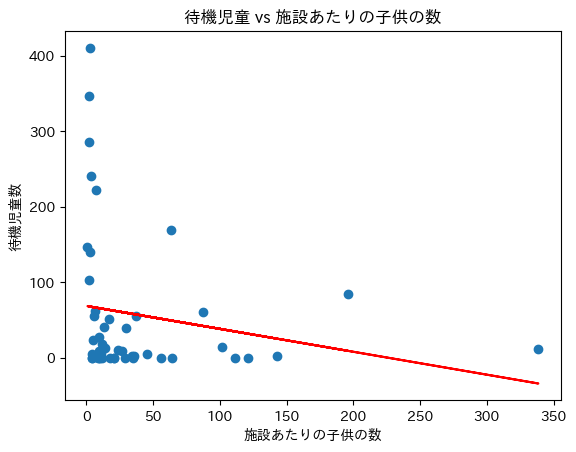

In [73]:
x = df_ratios["施設あたりの子供数"]
x2 = df_ratios["教員一人あたりの子供数"]
x3 = df_ratios["施設あたりの教員数"]
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)   # m: 傾き, b: 切片
plt.plot(x, m*x + b, color="red")
plt.title('待機児童 vs 施設あたりの子供の数')
plt.xlabel('施設あたりの子供の数')
plt.ylabel('待機児童数')
plt.show()

C:\Users\sk062\AppData\Local\Temp\ipykernel_9132\2800245833.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


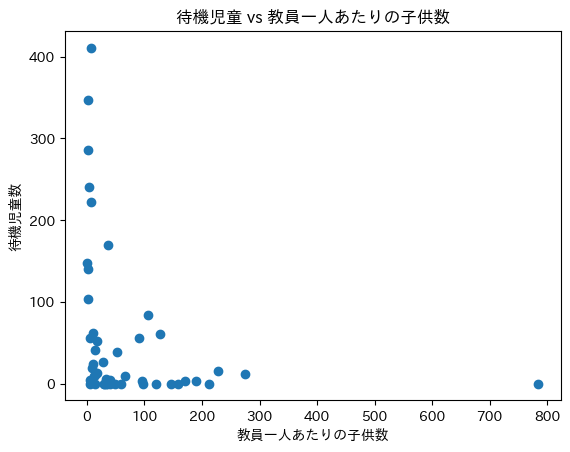

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x2,y)
ax.set_title('待機児童 vs 教員一人あたりの子供数')
ax.set_xlabel('教員一人あたりの子供数')
ax.set_ylabel('待機児童数')
fig.show()

C:\Users\sk062\AppData\Local\Temp\ipykernel_9132\1847619688.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


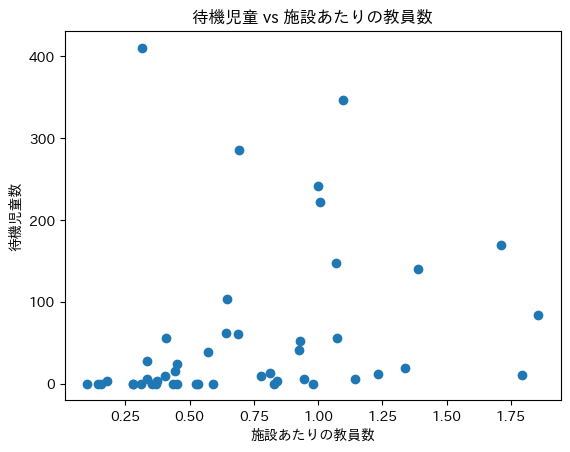

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x3,y)
ax.set_title('待機児童 vs 施設あたりの教員数')
ax.set_xlabel('施設あたりの教員数')
ax.set_ylabel('待機児童数')
fig.show()

In [76]:
df_ratios.columns

Index(['地域', '2023年度 待機児童', 'A1101_総人口【人】', 'A1201_0～4歳人口【人】', '保育所等数（基本票）',
       '保育所数÷子供の人数', '総教員数', '園長', '副園長', '教頭', '主幹教諭', '指導教諭', '教諭', '助教諭',
       '養護教諭', '養護助教諭', '栄養教諭', '講師', '教育補助員', '在園者数', '施設あたりの子供数',
       '教員一人あたりの子供数', '施設あたりの教員数'],
      dtype='object')

In [77]:
# --- 2. データの前処理 ---
# 分析に使用する説明変数（特徴量）のリストを定義
features = ['施設あたりの子供数', '教員一人あたりの子供数', '施設あたりの教員数']
X = df_ratios[features]

# '2023年度 待機児童' の中央値を計算
median_wait_children = df_ratios['2023年度 待機児童'].median()
print(f"待機児童数の中央値: {median_wait_children}\n")

# 中央値を境に「0: 少ない」「1: 多い」のカテゴリ変数を作成
# 中央値以下の場合は「少ない(0)」、中央値より大きい場合は「多い(1)」とします。
df_ratios['待機児童カテゴリ'] = (df_ratios['2023年度 待機児童'] > median_wait_children).astype(int)
y = df_ratios['待機児童カテゴリ']

# カテゴリごとの件数を確認
print("--- 待機児童カテゴリごとの件数 ---")
print(y.value_counts())

# 新しく作成したカラムを含めてデータフレームを確認
print("\n--- カテゴリ追加後のデータ (先頭5件) ---")
display(df_ratios.head())

待機児童数の中央値: 10.0

--- 待機児童カテゴリごとの件数 ---
待機児童カテゴリ
0    24
1    23
Name: count, dtype: int64

--- カテゴリ追加後のデータ (先頭5件) ---


,地域,2023年度 待機児童,A1101_総人口【人】,A1201_0～4歳人口【人】,保育所等数（基本票）,保育所数÷子供の人数,総教員数,園長,副園長,教頭,...,養護教諭,養護助教諭,栄養教諭,講師,教育補助員,在園者数,施設あたりの子供数,教員一人あたりの子供数,施設あたりの教員数,待機児童カテゴリ
0,北海道,62,5092000,142000,1099,0.006072,704,17,5,1,...,5,0,8,103,265,6846,6.229299,9.724432,0.640582,1
1,青森県,0,1184000,32000,472,0.014750,73,10,0,0,...,1,0,2,13,48,57303,121.404661,784.972603,0.154661,0
2,岩手県,27,1163000,32000,391,0.012219,131,12,1,0,...,3,0,0,21,71,3646,9.324808,27.832061,0.335038,1
3,宮城県,41,2264000,69000,515,0.007464,476,28,3,0,...,15,0,0,61,146,6959,13.512621,14.619748,0.924272,1
4,秋田県,3,914000,22000,268,0.012182,48,5,1,0,...,0,0,0,14,28,9075,33.861940,189.062500,0.179104,0


In [78]:
# --- 3. 決定木モデルの学習 ---
# 決定木分類器のインスタンスを作成
# max_depthを指定することで、木の深さを制限し、モデルの過学習を防ぎ、可視化しやすくします。
# random_stateを固定することで、実行のたびに同じ結果が得られるようにします。
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# 全てのデータを使ってモデルを学習
model.fit(X, y)

print("--- 決定木モデルの学習が完了しました ---")

--- 決定木モデルの学習が完了しました ---


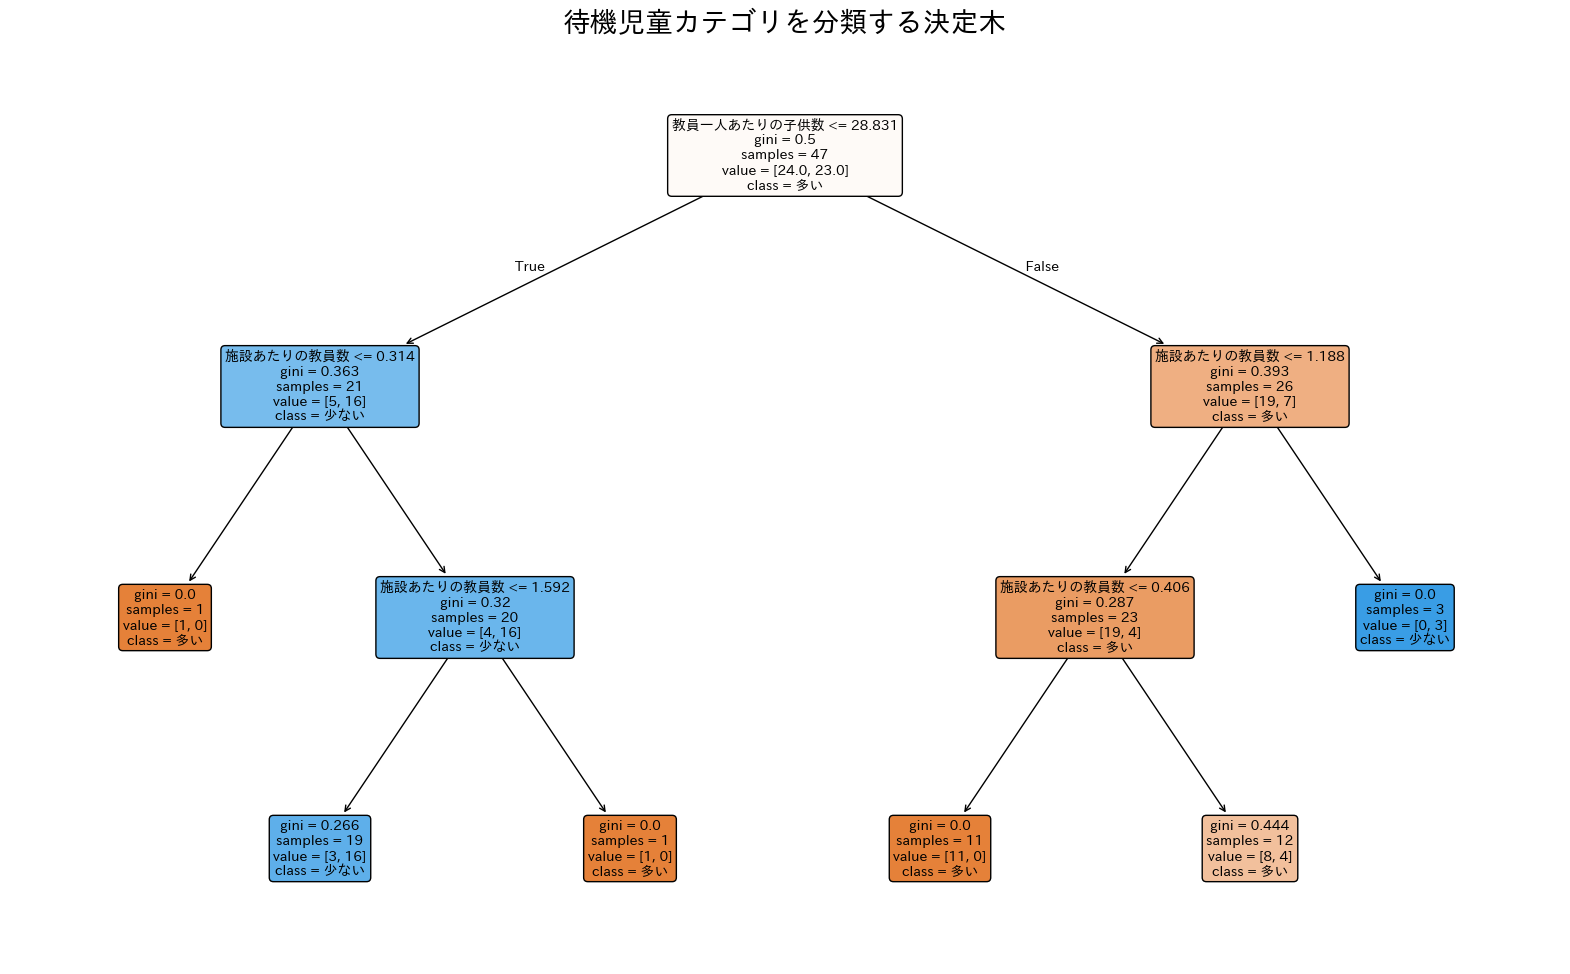

In [83]:
# --- 4. 決定木の可視化 ---
plt.figure(figsize=(20, 12))
plot_tree(model,
          feature_names=features,
          class_names=['多い', '少ない'],
          filled=True,
          proportion=False,
          rounded=True,
          fontsize=10)

plt.title("待機児童カテゴリを分類する決定木", fontsize=20)

# 保存 (保存先フォルダや拡張子に注意)
plt.savefig(r"C:\Users\sk062\Downloads\ketteigi.png", dpi=300, bbox_inches='tight')

plt.show()


In [80]:
# --- 5. 各地域の分類結果の表示 ---
# 各データがどの末端ノード（葉）に分類されたかを取得
leaf_ids = model.apply(X)
df_ratios['所属ノードID'] = leaf_ids

# 各データがどちらのカテゴリに予測されたかを取得
predicted_class = model.predict(X)
df_ratios['予測カテゴリ'] = predicted_class

# 予測カテゴリを文字列に変換
df_ratios['予測結果'] = df_ratios['予測カテゴリ'].apply(lambda x: '多い' if x == 1 else '少ない')

print("--- 各地域の分類結果 ---")
# '地域', 元の待機児童数, '所属ノードID', '予測結果' を表示
# Jupyter Notebookの `display` を使うと綺麗にテーブル表示されます
result_df = df_ratios[['地域', '2023年度 待機児童', '所属ノードID', '予測結果']]
display(result_df)

--- 各地域の分類結果 ---


,地域,2023年度 待機児童,所属ノードID,予測結果
0,北海道,62,4,多い
1,青森県,0,8,少ない
2,岩手県,27,4,多い
3,宮城県,41,4,多い
4,秋田県,3,8,少ない
5,山形県,0,8,少ない
6,福島県,13,4,多い
7,茨城県,5,4,多い
8,栃木県,0,2,少ない
9,群馬県,0,9,少ない


In [84]:
# CSVに保存
df_ratios.to_csv(r"C:\Users\sk062\Downloads\dfdf.csv", index=False, encoding="utf-8-sig")